In [1]:
%matplotlib inline
from fastai import *
from fastai.tabular import *

# Rossmann Data Preparation

In [2]:
path = Path('data/rossmann')
train_df = pd.read_pickle(path/'train_clean')

In [3]:
train_df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


In [4]:
n = len(train_df);
n

844338

## Create a small sample for experimentation

In [5]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()

In [6]:
small_train_df = train_df.iloc[idx[:1000]]
small_test_df = train_df.iloc[idx[1000:]]
small_cont_vars = ['CompetitionDistance', 'Mean_Humidity']
small_cat_vars = ['Store', 'DayOfWeek', 'PromoInterval']

In [7]:
small_train_df = small_train_df[small_cat_vars + small_cont_vars + ['Sales']]
small_test_df = small_test_df[small_cat_vars + small_cont_vars + ['Sales']]

In [8]:
small_train_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
673,675,5,"Jan,Apr,Jul,Oct",2100.0,61,4350
1716,605,4,"Jan,Apr,Jul,Oct",10310.0,60,9623
1881,770,4,NaN,100.0,73,6166
2871,647,3,NaN,7420.0,75,6150
2962,738,3,NaN,5980.0,67,7997


In [9]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
419691,8,3,NaN,7520.0,73,6452
419714,32,3,"Feb,May,Aug,Nov",2910.0,72,5376
419755,73,3,NaN,1650.0,73,4805
420145,463,3,NaN,4160.0,59,6902
420173,491,3,"Mar,Jun,Sept,Dec",4680.0,55,6854


We'll learn how to use Pre-processors. Please recall that Pre-processors are applied only once on the data, unlike transforms

In [10]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test = True)

In [11]:
small_train_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
673,675,5,"Jan,Apr,Jul,Oct",2100.0,61,4350
1716,605,4,"Jan,Apr,Jul,Oct",10310.0,60,9623
1881,770,4,NaN,100.0,73,6166
2871,647,3,NaN,7420.0,75,6150
2962,738,3,NaN,5980.0,67,7997


In [12]:
small_train_df.PromoInterval.cat.categories

Index(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'], dtype='object')

In [13]:
small_train_df['PromoInterval'].cat.codes

673       1
1716      1
1881     -1
2871     -1
2962     -1
3314     -1
4220     -1
4332      1
5001     -1
5383      1
6167      1
6209     -1
6591      1
6613      1
6855      1
6942     -1
7138     -1
7161     -1
7259     -1
9381     -1
9903      1
9980      0
10018    -1
10076     2
10541    -1
11096     2
11132     0
11422     1
11630    -1
11932    -1
         ..
403902    1
404546    0
404922   -1
405007    0
405443    2
405875   -1
406093    0
406268    1
407681   -1
408026   -1
408773    2
409347    1
409878    2
410122    1
410972   -1
411368    2
411994    1
412421    0
412663   -1
412817   -1
412956    1
413550   -1
413672   -1
415310   -1
415445    1
415831   -1
416921   -1
417394    0
417591    1
417990    1
Length: 1000, dtype: int8

In [14]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)
fill_missing(small_test_df, test = True)

In [15]:
small_train_df[small_train_df['CompetitionDistance_na'] == True]

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales,CompetitionDistance_na
147485,291,6,NaN,2640.0,64,4125,True
210675,622,4,NaN,2640.0,82,4439,True
220993,622,5,NaN,2640.0,78,5969,True
229064,291,2,NaN,2640.0,94,7095,True


# Working with the full dataset

In [16]:
train_df = pd.read_pickle(path/'train_clean')
test_df = pd.read_pickle(path/'test_clean')

In [17]:
len(train_df), len(test_df)

(844338, 41088)

In [18]:
procs = [FillMissing, Categorify, Normalize]

In [19]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [20]:
dep_var = 'Sales'
df = train_df[cat_vars + cont_vars + [dep_var, 'Date']].copy()

In [21]:
test_df['Date'].min(), test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [23]:
cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])]

In [27]:
cut = cut.index.max()

In [28]:
valid_idx = range(cut)

In [29]:
df[dep_var].head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [30]:
data = (TabularList.from_df(df, path=path, cat_names = cat_vars, cont_names = cont_vars, procs = procs)
       .split_by_idx(valid_idx)
       .label_from_df(cols = dep_var, label_cls = FloatList, log = True)
       .databunch())

In [31]:
doc(FloatList)

# Working with Model

We're using the y_range here, which should always be at least a bit larger than our intended range. Hence we're multiplying here with a constant.

In [32]:
max_log_y = np.log(np.max(train_df['Sales'])*1.2)
y_range = torch.tensor([0, max_log_y], device = defaults.device)

In [33]:
learn = tabular_learner(data, layers = [1000, 500], ps = [0.001, 0.01], emb_drop = 0.4,
                       y_range = y_range, metrics = exp_rmspe) # Here since our network is very big (1000, 500)
                                                                # our data is gonna overfit, hence ps(dropout)
                                        # Here ps = list of probab p for each layer with which the dropouts are done

In [34]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(26, 10)
    (7): Embedding(27, 10)
    (8): Embedding(5, 4)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(24, 9)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 15)
    (15): Embedding(22, 9)
    (16): Embedding(7, 5)
    (17): Embedding(7, 5)
    (18): Embedding(4, 3)
    (19): Embedding(4, 3)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=233, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (

In [35]:
len(data.train_ds.cont_names)

16

In [36]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


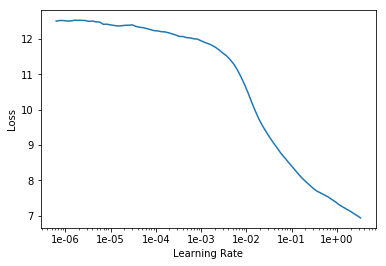

In [37]:
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(5, 1e-2, wd = 0.2)

epoch,train_loss,valid_loss,exp_rmspe
1,0.044732,0.031615,0.184820
2,0.050377,0.034224,0.183026
3,0.039520,0.039192,0.219363
4,0.027841,0.020341,0.142488
5,0.017422,0.017685,0.119717
